In [105]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/CEE_501/HW_4'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CEE_501/HW_4


In [106]:
#!pip install ucimlrepo

In [107]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
annealing = fetch_ucirepo(id=3)

# data (as pandas dataframes)
X_annealing = annealing.data.features
y_annealing = annealing.data.targets

# metadata
print(annealing.metadata)

# variable information
print(annealing.variables)

{'uci_id': 3, 'name': 'Annealing', 'repository_url': 'https://archive.ics.uci.edu/dataset/3/annealing', 'data_url': 'https://archive.ics.uci.edu/static/public/3/data.csv', 'abstract': 'Steel annealing data', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 798, 'num_features': 38, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': None, 'last_updated': 'Mon Dec 23 2024', 'dataset_doi': '10.24432/C5RW2F', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "Attribute Listing:\n    1. family:          --,GB,GK,GS,TN,ZA,ZF,ZH,ZM,ZS\n    2. product-type:    C, H, G\n    3. steel:           -,R,A,U,K,M,S,W,V\n    4. carbon:          continuous\n    5. hardness:        continuous\n    6. temper_rolling:  -,T\n    7. condition:       -,S,A,X\n    8. formabili

In [108]:
# Check for missing values
print("Missing values before preprocessing:")
print(X_annealing.isnull().sum())

# Replace '-' with a placeholder before handling missing values
X_annealing = X_annealing.replace('-', 'not_applicable')

# Drop columns that are entirely missing
cols_to_drop = ['m', 'marvi', 'corr', 'jurofm', 's', 'p']
X_annealing = X_annealing.drop(columns=cols_to_drop)


# Handle missing values (Example: fill with mode for categorical, mean for numerical)
# Identify categorical and numerical columns
categorical_cols = X_annealing.select_dtypes(include=['object']).columns
numerical_cols = X_annealing.select_dtypes(include=np.number).columns

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    X_annealing[col] = X_annealing[col].fillna(X_annealing[col].mode()[0])

# Fill missing values in numerical columns with mean
for col in numerical_cols:
    X_annealing[col] = X_annealing[col].fillna(X_annealing[col].mean())


print("\nMissing values after preprocessing:")
print(X_annealing.isnull().sum())

Missing values before preprocessing:
famiily                   772
product-type                0
steel                      86
carbon                      0
hardness                    0
temper-rolling            761
condition                 303
formability               318
strength                    0
non-ageing                793
surface-finish            889
surface-quality           244
enamelability             882
bc                        897
bf                        769
bt                        824
bw/me                     687
bl                        749
m                         898
chrom                     872
phos                      891
cbond                     824
marvi                     898
exptl                     896
ferro                     868
corr                      898
blue/bright/varn/clean    892
lustre                    847
jurofm                    898
s                         898
p                         898
shape                       0
thi

In [109]:
print("Missing values after one-hot encoding:")
print(X_annealing_encoded.isnull().sum())

Missing values after one-hot encoding:
carbon                      0
hardness                    0
formability                 0
strength                    0
enamelability               0
thick                       0
width                       0
len                         0
bore                        0
packing                     0
famiily_ZS                  0
steel_K                     0
steel_M                     0
steel_R                     0
steel_S                     0
steel_V                     0
steel_W                     0
condition_S                 0
surface-quality_E           0
surface-quality_F           0
surface-quality_G           0
bw/me_M                     0
blue/bright/varn/clean_C    0
blue/bright/varn/clean_V    0
shape_SHEET                 0
oil_Y                       0
dtype: int64


In [110]:
# Identify categorical columns for encoding
categorical_cols = X_annealing.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_annealing_encoded = pd.get_dummies(X_annealing, columns=categorical_cols, drop_first=True)

display(X_annealing_encoded.head())

,carbon,hardness,formability,strength,enamelability,thick,width,len,bore,packing,...,steel_W,condition_S,surface-quality_E,surface-quality_F,surface-quality_G,bw/me_M,blue/bright/varn/clean_C,blue/bright/varn/clean_V,shape_SHEET,oil_Y
0,8,0,2.22069,0,1.625,0.700,610.0,0,0,2.888889,...,False,True,False,False,True,False,False,False,False,True
1,0,0,2.00000,0,1.625,3.200,610.0,0,0,2.888889,...,False,True,True,False,False,False,False,False,False,True
2,0,0,2.00000,0,1.625,0.700,1300.0,762,0,2.888889,...,False,True,True,False,False,False,False,False,True,True
3,0,60,2.22069,0,1.625,2.801,385.1,0,0,2.888889,...,False,True,False,False,True,True,False,False,False,True
4,0,60,2.22069,0,1.625,0.801,255.0,269,0,2.888889,...,False,True,False,False,True,False,False,False,True,True


In [111]:
# Scale the features using StandardScaler
scaler_annealing = StandardScaler()
X_annealing_scaled = scaler_annealing.fit_transform(X_annealing_encoded)

# Convert target variable to binary (assuming '3' is positive class, others negative)
y_annealing_binary = y_annealing['class'].apply(lambda x: 1 if x == '3' else 0)


display(X_annealing_scaled[:5])
display(y_annealing_binary.head())

array([[ 3.18417881e-01, -4.76059808e-01,  0.00000000e+00,
        -2.66929754e-01,  0.00000000e+00, -5.72568959e-01,
        -4.21241532e-01, -6.75322821e-01, -2.26311354e-01,
         1.41151225e-14, -2.65182601e-01, -2.45382385e-01,
        -1.50927278e-01, -6.31469630e-01, -1.06119090e-01,
        -1.34687006e-01, -1.47022012e-01,  2.15916759e-01,
        -1.26904102e+00, -2.67579979e-01,  1.70920958e+00,
        -2.47922813e-01, -3.33890282e-02, -3.33890282e-02,
        -1.08609928e+00,  1.58474462e-01],
       [-2.65131623e-01, -4.76059808e-01, -4.08766568e-01,
        -2.66929754e-01,  0.00000000e+00,  2.29860800e+00,
        -4.21241532e-01, -6.75322821e-01, -2.26311354e-01,
         1.41151225e-14, -2.65182601e-01, -2.45382385e-01,
        -1.50927278e-01,  1.58360743e+00, -1.06119090e-01,
        -1.34687006e-01, -1.47022012e-01,  2.15916759e-01,
         7.87996591e-01, -2.67579979e-01, -5.85065760e-01,
        -2.47922813e-01, -3.33890282e-02, -3.33890282e-02,
        -1.08

,class
0,1
1,1
2,1
3,1
4,1


In [112]:
# Split X and y into train and test sets for annealing data
X_annealing_train, X_annealing_test, y_annealing_train, y_annealing_test = train_test_split(X_annealing_scaled, y_annealing_binary, test_size=0.2, random_state=42)

In [113]:
# Create the model for annealing data
model_annealing = Sequential()

# Add layers to the model
model_annealing.add(Dense(16, input_dim=X_annealing_train.shape[1], activation='relu'))
model_annealing.add(Dense(8, activation='relu'))
model_annealing.add(Dense(1, activation='sigmoid'))

# Compile the model with a specific learning rate
optimizer = Adam(learning_rate=0.005) # Trying a different learning rate
model_annealing.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model_annealing.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
# Train the model
model_annealing.fit(X_annealing_train, y_annealing_train, epochs=50, batch_size=32) # Keeping the previous batch size for now

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7084 - loss: 0.5855
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7833 - loss: 0.4402 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8412 - loss: 0.3656 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.3321 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8684 - loss: 0.2980 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8792 - loss: 0.2561 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9178 - loss: 0.2439 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8969 - loss: 0.2489 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9046 - loss: 0.2333
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8999 - loss: 0.2302 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9338 - loss: 0.1949 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

In [115]:
### Get predictions from the model on X_annealing_test
y_annealing_pred_proba = model_annealing.predict(X_annealing_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [116]:
#### The model outputs probabilities. Use threshold as 0.5.
# If output > 0.5 then assign as class 1 else 0.
y_annealing_pred = (y_annealing_pred_proba > 0.5).astype(int)

In [117]:
### Print Confusion matrix
print(confusion_matrix(y_annealing_test, y_annealing_pred))

[[ 40   7]
 [ 13 120]]


In [118]:
# Print Classification report
print(classification_report(y_annealing_test, y_annealing_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        47
           1       0.94      0.90      0.92       133

    accuracy                           0.89       180
   macro avg       0.85      0.88      0.86       180
weighted avg       0.90      0.89      0.89       180



In [119]:
# Re-create and compile the model with the best hyperparameters (learning_rate=0.001, batch_size=10 was best so far)
model_annealing = Sequential()

# Add layers to the model
model_annealing.add(Dense(16, input_dim=X_annealing_train.shape[1], activation='relu'))
model_annealing.add(Dense(8, activation='relu'))
model_annealing.add(Dense(1, activation='sigmoid'))

# Compile the model with the best learning rate
optimizer = Adam(learning_rate=0.001)
model_annealing.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model and capture the history
history_annealing = model_annealing.fit(X_annealing_train, y_annealing_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4748 - loss: 0.7553
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7533 - loss: 0.5844
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.4987
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.4500
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8284 - loss: 0.4069
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8479 - loss: 0.3641
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8398 - loss: 0.3586
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.3387
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.3232
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.2995
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.2992
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8958 - loss: 0.2691


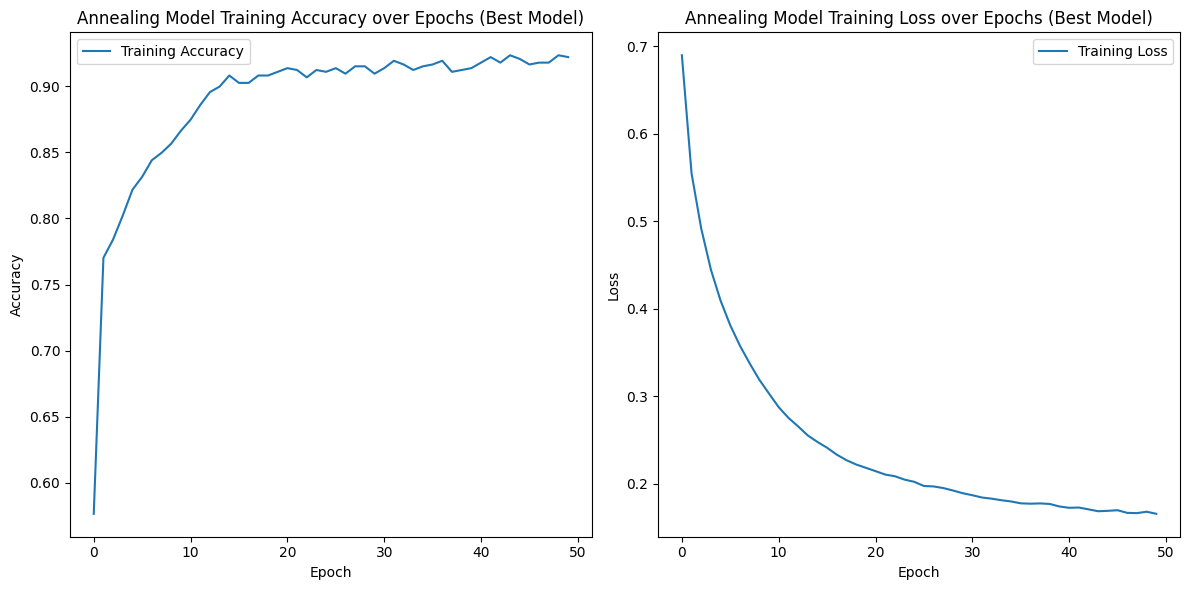

In [120]:
# Create the plot for training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_annealing.history['accuracy'], label='Training Accuracy')
plt.title('Annealing Model Training Accuracy over Epochs (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_annealing.history['loss'], label='Training Loss')
plt.title('Annealing Model Training Loss over Epochs (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()